<h1 style='color:black' align='center'>Spam Mail Prediction Project</h1>

<h2 style='color:blue'>Importing the Libraries</h2>

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h2 style='color:blue'>Load the Dataset</h2>

In [2]:
# loading the data from csv file to a pandas Dataframe
mail_data = pd.read_csv('e:/mail_data.csv')

In [3]:
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
mail_data.sample(5)

,Category,Message
217,ham,Tired. I haven't slept well the past few nights.
3532,ham,Prepare to be pounded every night...
2648,ham,"It,,s a taxt massage....tie-pos argh ok! Lool!"
646,ham,"Watching cartoon, listening music &amp; at eve..."
4119,ham,Watch lor. I saw a few swatch one i thk quite ...


<h2 style='color:blue'>Remove Null Values</h2>

In [5]:
mail_data['Message'].isnull().sum()

0

In [6]:
mail_data.dropna(axis = 0, inplace = True)

In [7]:
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# checking the number of rows and columns in the dataframe
mail_data.shape

(5572, 2)

<h2 style = 'color:blue'>Label Encoding</h2>

In [11]:
# label spam mail as 0;  ham mail as 1;
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
mail_data['Category'] = le.fit_transform(mail_data['Category'])
mail_data.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


<h2 style='color:blue'>spam  -  1</h2>

<h2 style='color:blue'>ham  -  0</h2>

In [12]:
# separating the data as texts and label

X = mail_data['Message']
Y = mail_data['Category']

In [13]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [14]:
print(Y)

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Category, Length: 5572, dtype: int32


<h2 style='color:blue'>Splitting the data into training data & test data</h2>

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

<h2 style='color:blue'>Feature Extraction</h2>

In [17]:
# transform the text data to feature vectors that can be used as input
from sklearn.feature_extraction.text import TfidfVectorizer

feature_extraction = TfidfVectorizer(min_df = 1, stop_words = 'english', lowercase = 'True')

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

In [18]:
print(X_train_features)

  (0, 3422)	0.6418008618863358
  (0, 3960)	0.40459749284424307
  (0, 4776)	0.2937599690543961
  (0, 4486)	0.4933198981059812
  (0, 3101)	0.30778739607068667
  (1, 3855)	0.4410710256765374
  (1, 4574)	0.4410710256765374
  (1, 2534)	0.4410710256765374
  (1, 814)	0.4410710256765374
  (1, 4555)	0.4205367990464199
  (1, 2902)	0.2120712188920981
  (2, 3398)	0.5133141633463273
  (2, 1317)	0.34462014146959175
  (2, 432)	0.4077104256374456
  (2, 4294)	0.36445133334144264
  (2, 2503)	0.5133141633463273
  (2, 4776)	0.2349500626979615
  (3, 1138)	0.6489221209014988
  (3, 1160)	0.44843330753299465
  (3, 3378)	0.38536596088088965
  (3, 3118)	0.3618113574629584
  (3, 3778)	0.31367701143832527
  (4, 3805)	1.0
  (5, 3731)	0.6020708068994186
  (5, 7381)	0.7984426989330436
  :	:
  (4454, 348)	0.2816333253882664
  (4454, 110)	0.3000941484572203
  (4454, 2067)	0.25658354936739225
  (4454, 4488)	0.3000941484572203
  (4454, 651)	0.3000941484572203
  (4454, 373)	0.23959800001827322
  (4454, 796)	0.28163332538

In [19]:
print(X_test_features)

  (0, 7478)	0.11238527640544621
  (0, 7420)	0.19398477272351503
  (0, 7260)	0.14384114349719565
  (0, 6602)	0.19398477272351503
  (0, 6350)	0.19398477272351503
  (0, 5782)	0.11386086683184304
  (0, 5452)	0.13293730388210073
  (0, 5038)	0.19398477272351503
  (0, 5014)	0.13293730388210073
  (0, 4496)	0.1102105484474495
  (0, 4466)	0.16951508500886583
  (0, 4302)	0.17357598220109133
  (0, 4250)	0.19398477272351503
  (0, 4004)	0.17357598220109133
  (0, 3867)	0.3120289176577842
  (0, 3630)	0.19398477272351503
  (0, 3310)	0.3946343133427287
  (0, 3136)	0.19398477272351503
  (0, 3060)	0.38796954544703005
  (0, 3059)	0.2772755538586351
  (0, 2114)	0.1302342007925869
  (0, 1493)	0.1368549641200954
  (0, 524)	0.19398477272351503
  (1, 7163)	0.4130504232751816
  (1, 7014)	0.39097385770203663
  :	:
  (1109, 2086)	0.3511723226114505
  (1110, 6677)	0.278010885413778
  (1110, 6020)	0.35653930858248284
  (1110, 5001)	0.39666689104890435
  (1110, 3863)	0.2030867005199339
  (1110, 3207)	0.36236761338841

In [20]:
# convert Y_train and Y_test values as integers

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

<h2 style='color:blue'>Training the Model</h2>

<h3 style='color:purple'>Logistic Regression</h3>

In [23]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter = 100, random_state = 0)
logistic_model.fit(X_train_features, Y_train)

logistic_test_score = logistic_model.score(X_test_features, Y_test)
print('Test set accuracy using Logistic Regression:', logistic_test_score * 100)

Test set accuracy using Logistic Regression: 96.68161434977578


<h3 style='color:purple'>Linear Regression</h3>

In [26]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train_features, Y_train)

linear_test_score = linear_model.score(X_test_features, Y_test)
print('Test set accuracy using Logistic Regression:', linear_test_score * 100)

Test set accuracy using Logistic Regression: 80.27366054420114


<h3 style='color:purple'>Support Vector Machine</h3>

In [27]:
from sklearn.svm import LinearSVC

svc = LinearSVC(loss = 'squared_hinge', random_state = 0)
svc.fit(X_train_features, Y_train)

svc_test_score = svc.score(X_test_features, Y_test)
print("Test Set Accuracy using SVC:", svc_test_score * 100)

Test Set Accuracy using SVC: 98.83408071748879


<h3 style='color:purple'>Multinomial Naive Bayes</h3>

In [28]:
from sklearn.naive_bayes import MultinomialNB

multi_nb = MultinomialNB()
multi_nb.fit(X_train_features, Y_train)

multi_nb_test_score = multi_nb.score(X_test_features, Y_test)
print('Test Set Accuracy using Multinomial NB:', multi_nb_test_score * 100)

Test Set Accuracy using Multinomial NB: 97.57847533632287


<h3 style='color:purple'>Decision Tree</h3>

In [29]:
from sklearn.tree import DecisionTreeClassifier

dtree_clf = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dtree_clf.fit(X_train_features, Y_train)

dtree_clf_test_score = dtree_clf.score(X_test_features, Y_test)
print('Test Set Accuracy using Decision Tree:', dtree_clf_test_score * 100)

Test Set Accuracy using Decision Tree: 96.8609865470852


<h2 style='color:blue'>Accuracy Score</h2>

In [30]:
# prediction on training data
from sklearn.metrics import accuracy_score

prediction_on_training_data = svc.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)
print('Accuracy on training data :', accuracy_on_training_data * 100)

Accuracy on training data : 99.95512676688355


In [32]:
# prediction on test data

prediction_on_test_data = svc.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)
print('Accuracy on test data : ', accuracy_on_test_data * 100)

Accuracy on test data :  98.83408071748879


<h2 style='color:blue'>Classification Report</h2>

In [38]:
from sklearn.metrics import classification_report

matrix = classification_report(Y_test, prediction_on_test_data)
print(matrix)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       955
           1       0.99      0.93      0.96       160

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.98      1115
weighted avg       0.99      0.99      0.99      1115



<h2 style='color:blue'>Confusion Matrix</h2>

In [39]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, prediction_on_test_data)
cm

array([[954,   1],
       [ 12, 148]], dtype=int64)

Text(51.0, 0.5, 'Actual Value')

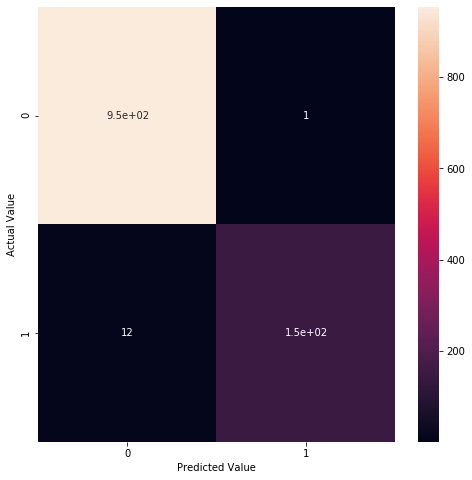

In [40]:
plt.figure(figsize = (8, 8))
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

<h2 style='color:blue'>Building a Predictive System</h2>

In [37]:
input_mail = ["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"]

# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# making prediction

prediction = svc.predict(input_data_features)

if (prediction[0] == 0):
    print(input_mail[0], '--> Ham mail')
else:
    print(input_mail[0], '--> Spam mail')

I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times --> Ham mail
